In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import time

In [3]:
data = pd.read_csv("./data/Summary of Weather.csv")

C:\Users\Piktorlabs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# print(data.shape)
# print(data.head())
# print(data.describe())

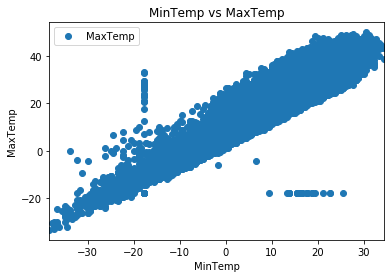

In [5]:
data.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [19]:
data['MaxTemp'].skew(),data['MinTemp'].skew()
# norm_skew = np.log(data['MaxTemp'])
# norm_skew.skew()

norm_skew_sqrt = np.sqrt(data['MaxTemp'])
l = norm_skew_sqrt.isna().fill()
print(norm_skew_sqrt.isna().fill())
print(norm_skew_sqrt.skew(),data['MaxTemp'].skew())

AttributeError: 'Series' object has no attribute 'fill'

ValueError: cannot convert float NaN to integer

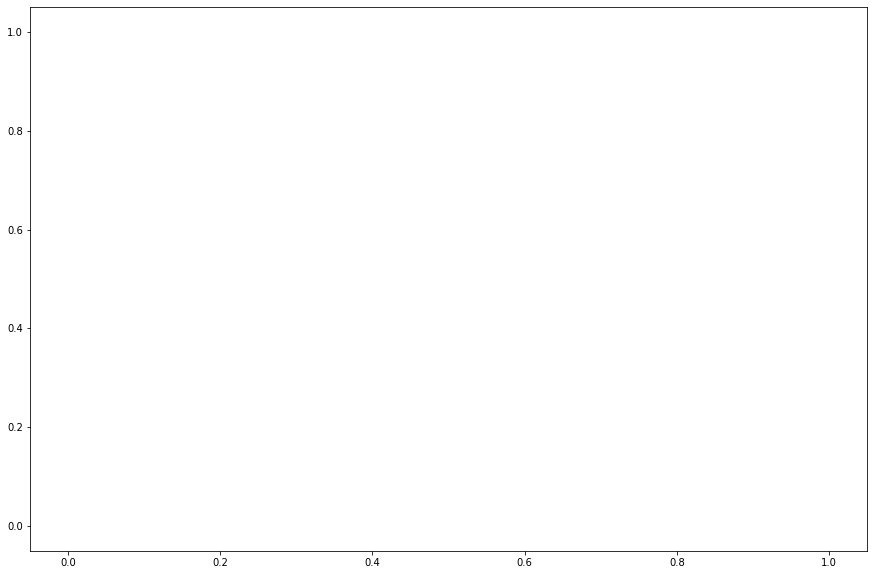

In [15]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(norm_skew_sqrt)
avg_max_temp = np.average(data['MaxTemp'], axis=0)
print(avg_max_temp)

-2.559481897630468e-16


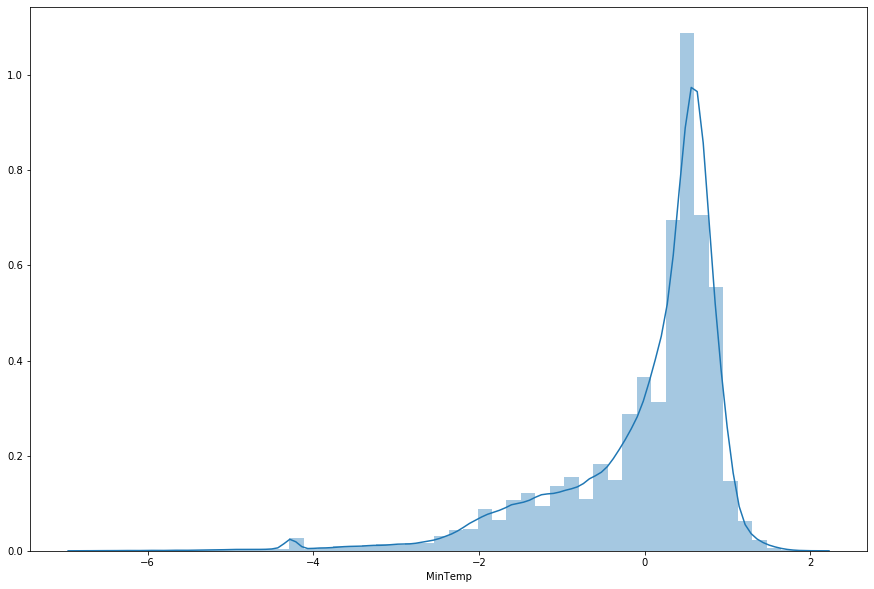

In [8]:
nrm_x = (data['MinTemp'] - np.mean(data['MinTemp']))/ np.std(data['MinTemp'])
nrm_y = (data['MaxTemp'] - np.mean(data['MaxTemp']))/ np.std(data['MaxTemp'])
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(nrm_x)
avg_max_temp = np.average(nrm_x, axis=0)
print(avg_max_temp)

In [9]:
x= nrm_x.values.reshape(-1, 1)
y = nrm_y.values.reshape(-1,1)
print(f"length x: {len(x)}, length y: {len(y)}")
print(f"shape x: {x.shape}, shape y: {y.shape}")

length x: 119040, length y: 119040
shape x: (119040, 1), shape y: (119040, 1)


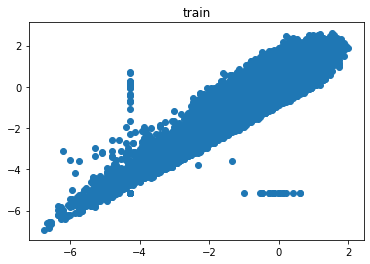

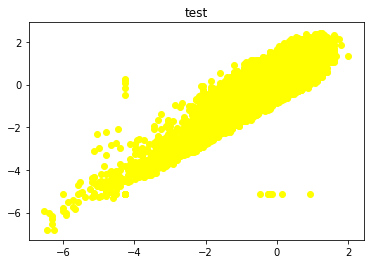

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train = (x_train - np.mean(x_train))/np.std(x_train)
x_test = (x_test - np.mean(x_test))/np.std(x_test)
plt.subplot(1,1,1)
plt.scatter(x_train, y_train) 
plt.title("train")
plt.show()
plt.subplot(1,1,1)
plt.scatter(x_test, y_test, color='yellow') 
plt.title("test")
plt.show()

In [11]:
def plot_optimization(x,y,intercept, slope, title):
    x_max = np.max(x)
    x_min = np.min(x)
    xfoLine = np.linspace(x_min, x_max, num = 100)
    yforLine = intercept + slope * xfoLine
    #drawing poit on plan
    plt.plot(xfoLine,yforLine, color='yellow')
    plt.scatter(x, y)
    plt.title(title)
    plt.show()

In [12]:
regressor = LinearRegression()  
%timeit regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

3.56 ms ± 829 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


slope: 0.8794864239641793
intercept: -0.00021012045361537513


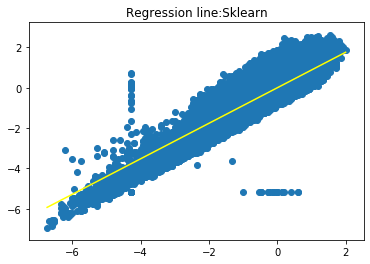

In [13]:
slope_sk, intercept_sk = regressor.coef_[0][0],regressor.intercept_[0]
print(f"slope: {slope_sk}")
print(f"intercept: {intercept_sk}")

plot_optimization(x_train, y_train,intercept_sk, slope_sk, title="Regression line:Sklearn")

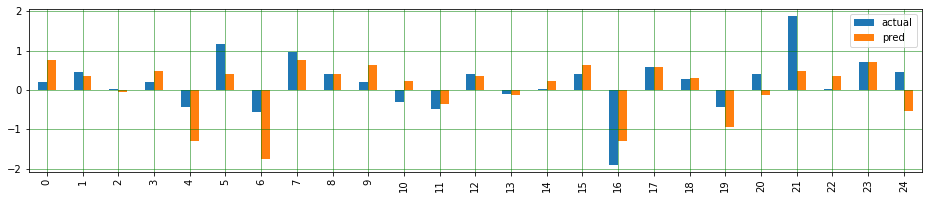

In [14]:
result = pd.DataFrame({"actual": y_test.flatten(), "pred": y_pred.flatten()})
df1 = result.head(25)
df1.plot(kind='bar',figsize=(16,3))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.36740270787285184
Mean Squared Error: 0.23193225648709442
Root Mean Squared Error: 0.48159345561074063


In [20]:
def getLearingRate_decay(epoch, lr, decay=1):
    learning_rate = 1 / (1 + decay + epoch) * lr
    print(f"learning_rate: {learning_rate}")
    return learning_rate;

def getLearingRate_squareroot_decay(epoch, lr, decay=1):
    learning_rate = lr * (decay/np.sqrt(epoch))
    print(f"learning_rate: {learning_rate}")
    return learning_rate;
    

def optimize_GD(x, y, epochs=20, m=0, c=0, lr=0.001):
    cost_list = []
    n = float(len(x))
    for epoch in range(epochs):
        y_pred = m*x + c;
        error = np.square(y_pred - y)
        cost_list.append(sum(error)[0])
        m_delta = -2/n * sum(x * error)
        c_delta = -2/n * sum(error)

        m = m - lr * m_delta
        c = c - lr * c_delta
        if epoch%500 == 0:
            print(f"Epoch: {epoch}, M: {m}, c:{c}")
            plot_optimization(x, y,c , m, title="Regression Line: Mannual, E:"+str(epoch))
            time.sleep(1)
    return (m, c, cost_list)  

def optimize_momentum_GD(x, y, epochs=20, m=0, c=0, lr=0.01):
    cost_list = []
    n = float(len(x))
    vm = 0
    vc = 0
    beta = 0.9
    for epoch in range(epochs):
        y_pred = m*x + c;
        error = np.square(y_pred - y)
        cost_list.append(sum(error)[0])
        m_delta = -2/n * sum(x * error)
        c_delta = -2/n * sum(error)
        
        vm = beta * vm + (1-beta)*m_delta
        vc = beta * vc + (1-beta)*c_delta

        m = m - lr * vm
        c = c - lr * vc
        if epoch%500 == 0:
            print(f"Epoch: {epoch}, M: {m}, c:{c}")
            plot_optimization(x, y,c , m, title="Regression Line: Mannual, E:"+str(epoch))
            time.sleep(1)
    return (m, c, cost_list) 

def optimize_rmsprop_GD(x, y, epochs=20, m=0, c=0, lr=0.1, apsilon=0.000000001):
    cost_list = []
    n = float(len(x))
    vm = 0
    vc = 0
    beta = 0.9
    for epoch in range(epochs):
        y_pred = m*x + c;
        error = np.square(y_pred - y)
        cost_list.append(sum(error)[0])
        m_delta = -2/n * sum(x * error)
        c_delta = -2/n * sum(error)
        
        sm = beta * vm + (1-beta)*np.square(m_delta)
        sc = beta * vc + (1-beta)*np.square(c_delta)

        m = m - lr * m_delta/np.sqrt(sm + apsilon)
        c = c - lr * c_delta/np.sqrt(sc + apsilon)
        
        if epoch%500 == 0:
            print(f"Epoch: {epoch}, M: {m}, c:{c}")
            plot_optimization(x, y,c , m, title="Regression Line: Mannual, E:"+str(epoch))
            time.sleep(1)
    return (m, c, cost_list) 

def optimize_adam_GD(x, y, epochs=20, m=0, c=0, lr=1,apsilon=0.000000001):
    cost_list = []
    n = float(len(x))
    vm = 0
    vc = 0
    sm = 0
    sc = 0
    beta_1 = 0.9
    beta_2 = 0.999
    for epoch in range(epochs):
        y_pred = m*x + c;
        error = np.square(y - y_pred)
        cost_list.append(sum(error)[0])
        m_delta = -2/n * sum(x * error)
        c_delta = -2/n * sum(error)
        
        vm = beta_1 * vm + (1-beta_1)*m_delta
        vc = beta_1 * vc + (1-beta_1)*c_delta
        
        sm = beta_2 * sm+ (1-beta_2)*np.square(m_delta)
        sc = beta_2 * sc+ (1-beta_2)*np.square(c_delta)
        
#         learning_rate = getLearingRate_decay(epoch, lr)
#         learning_rate = getLearingRate_squareroot_decay(epoch, lr)

        m = m - lr * vm/np.sqrt(sm + apsilon)
        c = c - lr * vc/np.sqrt(sc + apsilon)
        
        if epoch%50 == 0:
            print(f"Epoch: {epoch}, M: {m}, c:{c}")
            plot_optimization(x, y,c , m, title="Regression Line: Mannual, E:"+str(epoch))
            time.sleep(1)
    return (m, c, cost_list) 

Epoch: 0, M: [3.16227756], c:[-3.16227727]


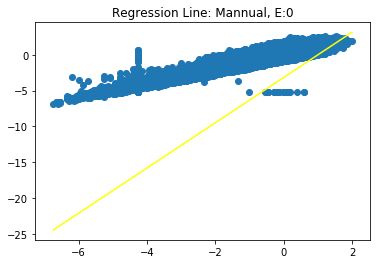

Epoch: 50, M: [332.39813702], c:[-332.67563418]


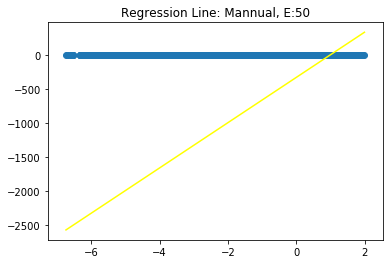

Final: slope: 461.6915102900478, intercept: -461.9487625062447


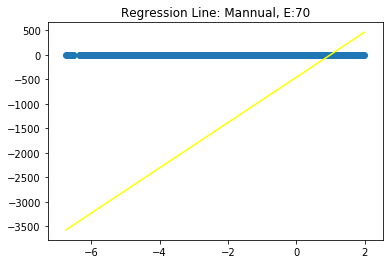

In [21]:
epochs = 70
# slope, intercept, cost = optimize_GD(x_train, y_train, epochs, lr=0.01)
# slope, intercept, cost = optimize_momentum_GD(x_train, y_train, epochs)
# slope, intercept, cost = optimize_rmsprop_GD(x_train, y_train, epochs)
slope, intercept, cost = optimize_adam_GD(x_train, y_train, epochs)
print(f"Final: slope: {slope[0]}, intercept: {intercept[0]}")
plot_optimization(x_train, y_train,intercept , slope, title="Regression Line: Mannual, E:"+str(epochs))

#sklearn: slope: [[0.92033997]], intercept: [10.66185201] 
#GD10_000 : slope: 0.9338654424975801, intercept: 10.368506091527475
#GD15000 : slope: 0.9225903335507145, intercept: 10.613045148087096
#GD8000: slope: 0.9480547972189535, intercept: 10.060761711131132
#GD3000: slope: 1.0869155744322576, intercept: 7.049093831654298
#M3000 : slope: 1.0868753608028938, intercept: 7.049966000875169
#M2000 lr0.01: slope: [0.92063758], intercept: [10.65539726]
#M3000 lr0.01: slope: 0.9203472229074626, intercept: 10.66169462571473
#rmsprop15000 lr0.01: slope: 0.9253596661521442, intercept: 10.66642863735628
#rmsprop500 lr0.1:  slope: [0.87053291], intercept:[10.60770557]
#rmsprop1000 lr0.1:  slope: 0.9703399978923728, intercept: 10.711851330936913
#rmsprop300 lr0.1: slope: 0.976804860323069, intercept: 10.572871058141377
#adam100 lr1: slope: 0.9317949142038237, intercept: 10.61873146891739

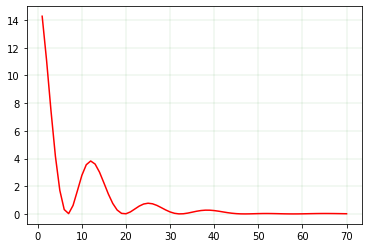

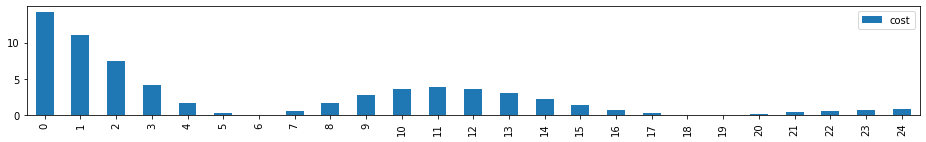

-1272145.0299006584


In [153]:
e_point = np.arange(1, epochs+1, step=1)
plt.grid(which='major', linestyle='-', linewidth='0.1', color='green')
nr_cost = (cost - np.mean(cost))/np.std(cost)
nr_cost_squared = np.square(nr_cost)
plt.plot(e_point,nr_cost_squared, color='red')
cost_df = pd.DataFrame({'cost':nr_cost_squared })
cost_df.head(25).plot(kind="bar", figsize=(16,2))
plt.show()
print(np.min(cost))

In [154]:
y_pred = slope * x_test + intercept
res_mannual = pd.DataFrame({"actual": y_test.flatten(), 'pred': y_pred.flatten()})

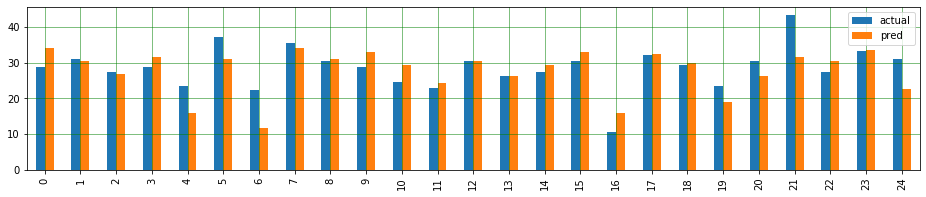

In [155]:
df1 = res_mannual.head(25)
df1.plot(kind='bar',figsize=(16,3))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [156]:
compare_pred = pd.DataFrame({'mannual_pred': res_mannual['pred'], 'sklearn_pred': result['pred']})

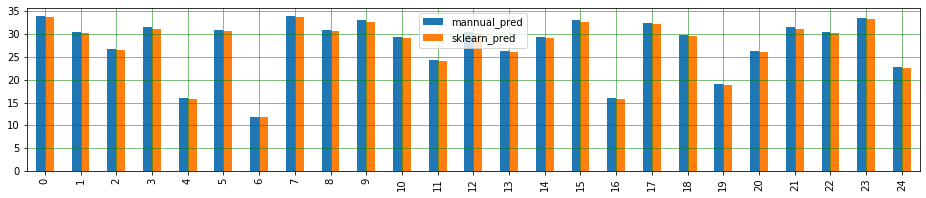

In [160]:
df_compare = compare_pred.head(25)
df_compare.plot(kind="bar", figsize=(16,3))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.show()

Multiple Linear Regression

In [161]:
wine_data = pd.read_csv('data/winequality-red.csv')

In [165]:
print(f"wine_data shape: {wine_data.shape}")
print(f"{wine_data.head(10)}")

wine_data shape: (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                 

In [167]:
print(f"{wine_data.describe()}")

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [172]:
wine_data.isnull().any()
#default fill at null value
wine_data = wine_data.fillna(method='ffill')

In [174]:
#Data seperation
X = wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
y = wine_data['quality'].values

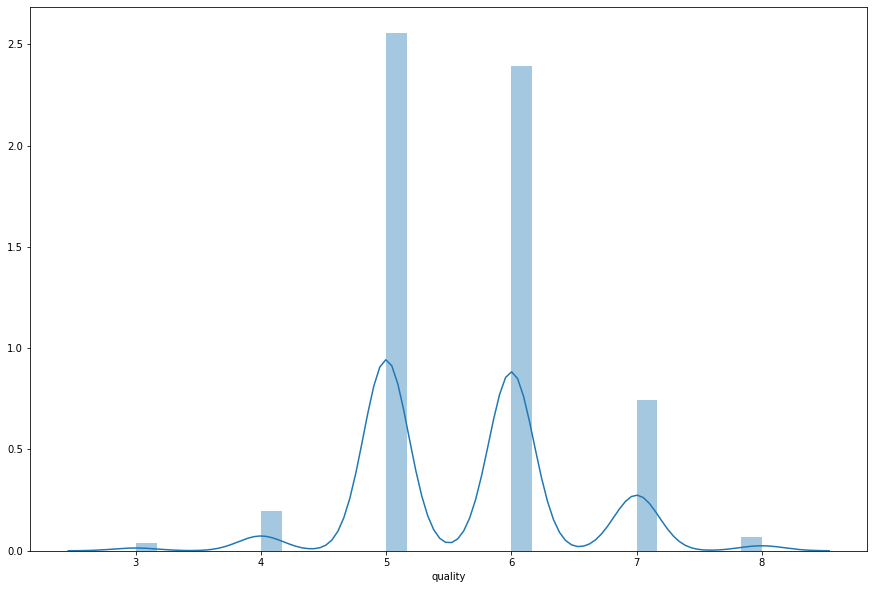

In [176]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(wine_data['quality'])

In [179]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
slope_sk, intercept_sk = regressor.coef_,regressor.intercept_
print(f"slope: {slope_sk}")
print(f"intercept: {intercept_sk}")

slope: [ 4.12835075e-02 -1.14952802e+00 -1.77927063e-01  2.78700036e-02
 -1.87340739e+00  2.68362616e-03 -2.77748370e-03 -3.15166657e+01
 -2.54486051e-01  9.24040106e-01  2.67797417e-01]
intercept: 34.998710628721106


In [199]:
coff_list = pd.DataFrame({"feature": wine_data.columns[:11], "co-eff": slope_sk})
print(coff_list)

                 feature     co-eff
0          fixed acidity   0.041284
1       volatile acidity  -1.149528
2            citric acid  -0.177927
3         residual sugar   0.027870
4              chlorides  -1.873407
5    free sulfur dioxide   0.002684
6   total sulfur dioxide  -0.002777
7                density -31.516666
8                     pH  -0.254486
9              sulphates   0.924040
10               alcohol   0.267797


In [195]:
wine_data.columns[:11]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

### 

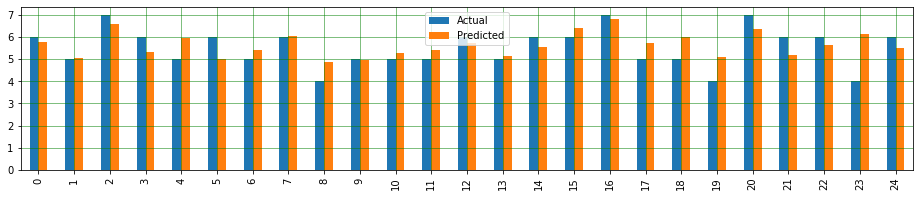

In [206]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,3))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [207]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.46963309286611
Mean Squared Error: 0.38447119782012373
Root Mean Squared Error: 0.6200574149384263


In [208]:
#rmse grater than 10% of mean: 5.63 of data, model is not accurate but resonable

In [ ]:
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA5gAAADFCAYAAAAxMF0JAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nO3de5xcdX3w8c+XJLokRISgyMWyqcilRQm4+hggGlEh3mKB8qDFYtSH2KIQtUqD1BdjvaHwKFZFSisgXpL6oAEKFWOKK61WIAHUaAigBomriCmJiRAhyff5Yybp5rIzE3PmzBn283699pXZc87O+eTMzO785pw5E5mJJEmSJEm7arduB0iSJEmSnhgcYEqSJEmSCuEAU5IkSZJUCAeYkiRJkqRCOMCUJEmSJBXCAaYkSZIkqRBjO3Gl++yzT/b39+/Sdax6ZBWTxk8qJqgA9jRXpZ4qtYA9zVSpBexppUo9VWoBe5qpUgvY00qVeqrUAvY0U6UWsKeVInqWLFnym8x82g5nZmbhX8973vNyV13wrQt2+TqKZE9zVeqpUkumPc1UqSXTnlaq1FOllkx7mqlSS6Y9rVSpp0otmfY0U6WWTHtaKaIHWJwjjAU9RFaSJEmSVAgHmJIkSZKkQrQcYEbEoRFx17Cv30bEO8qIkyRJkiT1jpYn+cnM5cAUgIgYA/wCWNDhLkmSePzxx1m5ciXr16/favqJe57IsmXLulS1vV7o6evr48ADD2TcuHFdqpIkjQY7exbZlwI/ycz7OxEjSdJwK1euZOLEifT39xMRW6YPrR1i/4n7d7Fsa1XvyUxWrVrFypUrmTx5chfLJElPdDv7HszXAfM6ESJJ0rbWr1/PpEmTthpcaudFBJMmTdpuT7AkSUWL+llm21gw4knAEPCnmfngDubPBmYDTNpv0vPe/uW371LY4IpBpvdP36XrKFKZPZcsuqflMlMOHhq126eVKrWAPc1UqQXsaaUbPSfueSIHHXzQdtPX/n4tE588sdSWZnql5/777ucba75Rastovh/793zXVKkFvO80M5pvq3Y8EXve/5L3L8nMgR3N25kB5muBt2XmCa2WHRgYyMWLF+9c5TZqgzVq02u7dB1FKrOnf+6NLZeZNeP2Ubt9WqlSC9jTTJVawJ5WutGzbNkyDj/88O2ml31I6oIFCzj55JNZtmwZhx122Ig9V111FSeccAL77/+HtQ0ODnLxxRdzww037FLvSNtnpO3ZSaP5fuzf811TpRbwvtPMaL6t2vFE7ImIEQeYO/MezNfj4bGSpC7a+knXnbt8fSsufFVby82bN4/jjjuO+fPnU6vVRlzuqquu4ogjjviDB5iSJPW6tt6DGRHjgZcDX+tsjiRJ1bJu3Tq+853v8LnPfY758+dvmf6xj32M5zznORx55JF8+IIPc80117B48WJOP/10pkyZwqOPPkp/fz+/+c1vAFi8eDHTp08H4LbbbuOYY47hqKOO4phjjmH58uXd+K9JklS4tvZgZuYjwKQOt0iSVDnXXnstM2bM4JBDDmHvvffmjjvu4MEHH+Taa6/l1ltvZfz48fzo/h/xpwf9KZ/+9Ke5+OKLGRjY4VFDWxx22GHccsstjB07lkWLFvHe976Xr371qyX9j1Qpgx+BwU80X6a2ppwWSSrAzn5MiSRJo8q8efN4xzveAcDrXvc65s2bx6ZNm3jTm97E+PHjAdhr77126jrXrFnDG9/4Ru69914igscff7zwbkmSusEBpiRJI1i1ahU333wzS5cuJSLYuHEjEcEpp5zS1kenjB07lk2bNgFs9REh73vf+3jJS17CggULWLFixZZDZyVJ6nU7+zmYkiSNGtdccw1nnHEG999/PytWrOCBBx5g8uTJ7L333lxxxRU88sgjADz83w8DMHHiRNauXbvl5/v7+1myZAnAVofArlmzhgMOOAConxhIkqQnCgeYkiSNYN68eZx00klbTTvllFMYGhpi5syZDAwMMGXKFC771GUAzJo1i7/6q7/acpKfCy64gDlz5jBt2jTGjBmz5TrOPfdczjvvPI499lg2btxY6v9JkqRO8hDZXuVJASSNQps/VqSsz8EcHBzcbto555yz5fLcuXO39EB98HnKKadsmT9t2jTuuWf7D0yfOnXqVtM/8IEPADB9+nQPl5Uk9TT3YEqSJEmSCuEAU5IkSZJUCAeYkiRJkqRC+B5MSZI0engOA0nqKAeYkiRJUq/xxRJVlIfISpIkSZIK4QBTkqQmxowZw5QpUzjiiCM49dRTeeSRR/7g6xocHOTVr341ANdffz0XXnjhiMuuXr2aSy+9dKfXUavVuOwfLvuDGyVJ2hUeIitJ6h21PQEo7BMw2zh8bPfdd+euu+4C4PTTT+eyyy7jXe9615b5mcmmTZt2etUzZ85k5syZI87fPMA866yzdvq6JUnqlrb2YEbEUyPimoi4OyKWRcTUTodJklQ106ZN47777mPFihUcfvjhnHXWWRx99NEMrRxi4cKFTJ06laOPPppTTz2VdevWAXDTTTdx2GGHcdxxx/G1r31ty3VdddVVvP3tbwfgwQcf5KSTTuLII4/kyCOP5Lvf/S5z587lJz/5CVOmTOE973kPABdddBHPf/7zee5zn8sFF1yw5bo+9KEPceihh/Kyl72M5cuXl7hFJEnaWrt7MD8J3JSZfx4RTwLGd7BJkqTK2bBhA1//+teZMWMGAMuXL+fKK6/k0ksvZemKpbz7g+9m0aJFTJgwgY9+9KN8/OMf59xzz+XMM8/k5ptv5uCDD+a0007b4XWfc845vPjFL2bBggVs3LiRdevWceGFF7J06dIte08XLlzIvffey2233UZmMnPmTG655RYmTJjA/PnzufPOO9mwYQNHH300zz7i2aVtF0lSC6PshEwtB5gR8RTgRcAsgMx8DHiss1mSJFXDo48+ypQpU4D6Hsy3vOUtDA0NcdBBB/HCF74QgCW3LeHHP/4xxx57LACPPfYYU6dO5e6772by5Mk8+9n1Ad8b3vAGLr/88u3WcfPNN3P11VcD9fd87rnnnjz88MNbLbNw4UIWLlzIUUcdBcC6deu49957Wbt2LSeddBLjx9df+2122K0kSZ3Wzh7MPwYeAq6MiCOBJcCczPxdR8skPfGNslf01JuGvwdzuAkTJmy5nCQvf/nLmTdv3lbL3HXXXUREIR2ZyXnnncdb3/rWraZfcsklha1DkqRd1c4AcyxwNHB2Zt4aEZ8E5gLvG75QRMwGZgNM2m8StcFa0yu9ZNE9TedPOXio5XWUaXDFYGk9q8c23zYAg2ygxvoWC9UK6Wl1W0G1bq8yb6te2zZQ3vZpa9uMLe9+3I4y7zvtsAdO3PNEhtYObfm+sJP7NAy/7pFsyuTOX/x065/71UrWb3hsy/RDn3so5//N+Xznru8w+VmTefSRRxn6xRAHPPMA7vvpfXz3+9+l/4/7ueLqK1i/YT1Da4d4eP3D/O6x3zG0dohjXnQMF37iQs5825ls3LiRR373CI/zOKt/u3pL48C0AS764EUcP/N4JuwxgV8O/ZJx48Zx+PMO551//U7OeNsZbNywkQXXLeDUM07d4f9t9frVhd6GVfsdWLXfO1X7e96OKv3eGRz8ALXBjzRfaPp55cQwep8L9uTjvGrPvUbZ8/Z2BpgrgZWZeWvj+2uoDzC3kpmXA5cDDAwMZG16remVXnXTjU3nT++/nVbXUabaYK20nlbbBmD62K9So6/FQrXyeip0e9VqT6a24s4WCxWzV6zXtg2Ud1+u2v24HWU+ztthDyxbtoz9JxY9rPwf7V13MCb33mrKbrkOcsyW6Qcd0McXPv8F3nHmO/j9738PwAc/+EGmHT2Nz/3T53jzaW9mn3324bjjjmPp0qXsP3F/9urbiwlPmsD+E/fn8ksvZ/bs2Zz4pRMZM2YMn/3sZ5k6dSovOu5FnDD1BF7xildw0UUX8ev7f83JJ5wMwB577MEXv/hFTpx2Iqe//nReOe2VHHTQQbzkxS+hb2zfDv9va/rWUDuqtkvbbLiq/Q6s2u+dqvW0o0q/d2qDHxm126ZK952efJxX7rlXefflsrbP+3n/iPNaDjAz81cR8UBEHJqZy4GXAj/epSJJkv4QjReHhtYOdXTgOdz3lq/cbtoBz/wjvvbv/7XVtOOPP57bb799u2VnzJjB3Xffvd30WbNmMWvWLAD23Xdfrrvuuu2W+fKXv7zV93PmzGHOnDnbLXf++edz/vnnb/m+nT2zkiR1QrtnkT0b+FLjDLI/Bd7UuSRJkiRJUi9qa4CZmXcBAx1ukSRJkiT1sHb3YJbPs0tKkiRJUk+p7gBTkiTqH89R+Y/hWPtLWPtg82X2P6qclhFkZlfXrx7R6gV+X9yX1MJu3Q6QJGkkfX19rFq1ysHRLspMVq1aRV9fi7MYSpK0i9yDKUmqrAMPPJCVK1fy0EMPbTV99frVrOkrZ0/Kgw8/2nKZ38VDrKHFXtY1ywoqam1H26evr48DDzywtAZJ6hrfatdVDjAlSZU1btw4Jk+evN302mCt0M9zbOYVc1t/ptisvpNbf8ZZiU9mytw+kiQN5wBTkiR1jnsSJGlUcYApSZIkSaNFh0/m5Ul+JEmSJEmFcA+mNNp4uJqeCLwfS5JUSe7BlCRJkiQVwj2YKoYfzCxJkiSNeg4wJUnt8YUkSZLUgofISpIkSZIK0dYezIhYAawFNgIbMnOgk1GSJEmSeoQnXtMwO3OI7Esy8zcdK5EkScXwyZ4kqUt8D6YkSZLUii/cSG1pd4CZwMKISOAfM/PyDjZVk79UJEmSJKmpdgeYx2bmUEQ8HfhmRNydmbcMXyAiZgOzASbtN4naYK3pFa4ee0/T+YNsoMb65lUt1tGuSxY1bwGYMra8nlbbBsrdPoX0jObbavBfqA1+pPlC088rpKdK26dq9+N2DK4YbPm7qyht3VYHD1Wrp9V9ZzQ/zkfp36yqbRt7mvNxvmtG632nSi1V7GlHz22fXWyJzNy5H4ioAesy8+KRlhkYGMjFixc3vZ7+uTc2nT+r72Rq9DWPKWiPYasWewroqVKLPaX0VKmlXbXBGrXptVLWVbXt4+Pcnl5vsaekniq1FNjTjlrtyb11WxXUU6WWKva0o+fuO220RMSSkU782vJjSiJiQkRM3HwZOAFY2nKtkiRJkqRRpZ1DZPcFFkTE5uW/nJk3dbRKkrrB91pLkiTtkpYDzMz8KXBkCS2SJEmSpB7W8hBZSZIkSZLa4QBTkiRJklQIB5iSJEmSpEI4wJQkSZIkFcIBpiRJkiSpEA4wJUmSJEmFcIApSZIkSSqEA0xJkiRJUiEcYEqSJEmSCuEAU5IkSZJUCAeYkiRJkqRCOMCUJEmSJBXCAaYkSZIkqRAOMCVJkiRJhWh7gBkRYyLizoi4oZNBkiRJkqTetDN7MOcAyzoVIkmSJEnqbW0NMCPiQOBVwD93NkeSJEmS1KvGtrncJcC5wMSRFoiI2cBsgEn7TaI2WGt6havH3tN0/iAbqLG+eVWLdbSrVYs9BfRUqcWeUnqq1AJwyaLWPVPGjs7bqrCeKrXYMyof5/aU0FOllgJ7/BvRGy1V7HlC3nd2sSUys/kCEa8GXpmZZ0XEdODdmfnqZj8zMDCQixcvbnq9/XNvbDp/Vt/J1Ohrugy1Nc3nt6lViz0F9FSpxZ5SeqrUYk9JPVVqscfHuT2d6alSiz0+zu3pTE8bLRGxJDMHdjSvnUNkjwVmRsQKYD5wfER8sY2fkyRJkiSNIi0HmJl5XmYemJn9wOuAmzPzDR0vkyRJkiT1FD8HU5IkSZJUiHZP8gNAZg4Cgx0pkSRJkiT1NPdgSpIkSZIK4QBTkiRJklQIB5iSJEmSpEI4wJQkSZIkFcIBpiRJkiSpEA4wJUmSJEmFcIApSZIkSSqEA0xJkiRJUiEcYEqSJEmSCuEAU5IkSZJUCAeYkiRJkqRCOMCUJEmSJBXCAaYkSZIkqRAtB5gR0RcRt0XE9yPiRxHx/jLCJEmSJEm9ZWwby/weOD4z10XEOOA/I+Lrmfm9DrdJkiRJknpIywFmZiawrvHtuMZXdjJKkiRJktR72tmDSUSMAZYABwOfycxbd7DMbGA2wKT9JlEbrDW9ztVj72k6f5AN1FjfPKzFOtrVqsWeAnqq1GJPKT1VarGnpJ4qtdjj49yezvRUqcUeH+f2dKZnF1uivoOyzYUjngosAM7OzKUjLTcwMJCLFy9uel39c29sOn9W38nU6GseVFvTfH6bWrXYU0BPlVrsKaWnSi32lNRTpRZ7fJzb05meKrXY4+Pcns70tNESEUsyc2BH83bqLLKZuRoYBGbszM9JkiRJkp742jmL7NMaey6JiN2BlwF3dzpMkiRJktRb2nkP5n7A5xvvw9wN+Epm3tDZLEmSJElSr2nnLLI/AI4qoUWSJEmS1MN26j2YkiRJkiSNxAGmJEmSJKkQDjAlSZIkSYVwgClJkiRJKoQDTEmSJElSIRxgSpIkSZIK4QBTkiRJklQIB5iSJEmSpEI4wJQkSZIkFcIBpiRJkiSpEA4wJUmSJEmFcIApSZIkSSqEA0xJkiRJUiFaDjAj4pkR8a2IWBYRP4qIOWWESZIkSZJ6y9g2ltkA/E1m3hERE4ElEfHNzPxxh9skSZIkST2k5R7MzPxlZt7RuLwWWAYc0OkwSZIkSVJv2an3YEZEP3AUcGsnYiRJkiRJvaudQ2QBiIg9gK8C78jM3+5g/mxgNsCk/SZRG6w1vb7VY+9pOn+QDdRY3zyqxTra1arFngJ6qtRiTyk9VWqxp6SeKrXY4+Pcns70VKnFHh/n9nSmZxdbIjNbLxQxDrgB+EZmfrzV8gMDA7l48eKmy/TPvbHp/Fl9J1Ojr/mKamtapbSlVYs9BfRUqcWeUnqq1GJPST1VarHHx7k9nempUos9Ps7t6UxPGy0RsSQzB3Y0r52zyAbwOWBZO4NLSZIkSdLo1M57MI8F/hI4PiLuany9ssNdkiRJkqQe0/I9mJn5n0CU0CJJkiRJ6mE7dRZZSZIkSZJG4gBTkiRJklQIB5iSJEmSpEI4wJQkSZIkFcIBpiRJkiSpEA4wJUmSJEmFcIApSZIkSSqEA0xJkiRJUiEcYEqSJEmSCuEAU5IkSZJUCAeYkiRJkqRCOMCUJEmSJBXCAaYkSZIkqRAtB5gRcUVE/DoilpYRJEmSJEnqTe3swbwKmNHhDkmSJElSj2s5wMzMW4D/LqFFkiRJktTDfA+mJEmSJKkQY4u6ooiYDcwGmLTfJGqDtabLrx57T9P5g2ygxvrmK22xjna1arGngJ4qtdhTSk+VWuwpqadKLfb4OLenMz1VarHHx7k9nenZxZbIzNYLRfQDN2TmEe1c6cDAQC5evLjpMv1zb2w6f1bfydToa76i2pp2clpq1WJPAT1VarGnlJ4qtdhTUk+VWuzxcW5PZ3qq1GKPj3N7OtPTRktELMnMgR3N8xBZSZIkSVIh2vmYknnAfwGHRsTKiHhL57MkSZIkSb2m5XswM/P1ZYRIkiRJknqbh8hKkiRJkgrhAFOSJEmSVAgHmJIkSZKkQjjAlCRJkiQVwgGmJEmSJKkQDjAlSZIkSYVwgClJkiRJKoQDTEmSJElSIRxgSpIkSZIK4QBTkiRJklQIB5iSJEmSpEI4wJQkSZIkFcIBpiRJkiSpEG0NMCNiRkQsj4j7ImJup6MkSZIkSb2n5QAzIsYAnwFeAfwJ8PqI+JNOh0mSJEmSeks7ezBfANyXmT/NzMeA+cBrO5slSZIkSeo17QwwDwAeGPb9ysY0SZIkSZK2iMxsvkDEqcCJmfl/Gt//JfCCzDx7m+VmA7Mb3x4KLN/Ftn2A3+zidRTJnuaq1FOlFrCnmSq1gD2tVKmnSi1gTzNVagF7WqlST5VawJ5mqtQC9rRSRM9Bmfm0Hc0Y28YPrwSeOez7A4GhbRfKzMuBy/+gvB2IiMWZOVDU9e0qe5qrUk+VWsCeZqrUAva0UqWeKrWAPc1UqQXsaaVKPVVqAXuaqVIL2NNKp3vaOUT2duDZETE5Ip4EvA64vlNBkiRJkqTe1HIPZmZuiIi3A98AxgBXZOaPOl4mSZIkSeop7RwiS2b+G/BvHW7ZVmGH2xbEnuaq1FOlFrCnmSq1gD2tVKmnSi1gTzNVagF7WqlST5VawJ5mqtQC9rTS0Z6WJ/mRJEmSJKkd7bwHU5IkSZKklhxgSpIkSZIK4QBTkiRJklSItk7yU4aIOAx4LXAAkNQ/a/P6zFzW1bCKaGyfA4BbM3PdsOkzMvOmklteAGRm3h4RfwLMAO5unAyq6yLi6sw8o9sdABFxHPACYGlmLix53f8LWJaZv42I3YG5wNHAj4EPZ+aaknvOARZk5gNlrnckwz52aSgzF0XEXwDHAMuAyzPz8ZJ7ngWcRP1zhzcA9wLzyr6dJEnSE1dEPD0zf93JdVRiD2ZE/C0wHwjgNuqfvRnAvIiY2822bUXEm7qwznOA64CzgaUR8dphsz9ccssFwD8An42IjwCfBvYA5kbE+WW2NHqu3+brX4GTN3/fhZ7bhl0+k/r2mQhc0IX78hXAI43LnwT2BD7amHZlyS0AHwBujYj/iIizIuJpXWgY7krgVcCciPgCcCpwK/B84J/LDGk8xi8D+hrr3536QPO/ImJ6mS1SJ0TE07vdUFURManbDaq2iNgzIi6MiLsjYlXja1lj2lO73TdcRHy9C+t8SkR8JCK+0HixePi8S7vQ84yI+GxEfCYiJkVELSJ+GBFfiYj9Sm7Ze5uvScBtEbFXROzdsRVnZte/gHuAcTuY/iTg3m73bdP08y6s84fAHo3L/cBiYE7j+zu70DIGGA/8FnhKY/ruwA+6sG3uAL4ITAde3Pj3l43LL+5Cz53DLt8OPK1xeQLww5Jblg3fTtvMu6sb24b6i1onAJ8DHgJuAt4ITOxCzw8a/44FHgTGNL6Psu/Lmx9XjcvjgcHG5T8q+zE+rGlP4ELgbmBV42tZY9pTu9E0QufXu7DOpwAfAb4A/MU28y7tQs8zgM8CnwEmAbXGfeorwH5d6Nl7m69JwApgL2DvkltmDLu8Z+N3zw+ALwP7dmHbXAjs07g8APwUuA+4v0t/s+4A/g54Vtnr3kHLAPCtxt/0ZwLfBNY0/pYe1YWePYC/B37U6HgI+B4wqwst3wD+FnjGsGnPaEz7Zhd6jh7h63nAL7vQ89XGY+vPgOsb3z+5Me+OLvTcRH2n0NzG75u/bfw9Pxu4ruSWTcDPtvl6vPHvTzu13qocIrsJ2J/6L9jh9mvMK1VE/GCkWcC+ZbY0jMnGYbGZuaKxR+OaiDio0VSmDZm5EXgkIn6Smb9tdD0aEaXfVtT/IM0Bzgfek5l3RcSjmfntLrQA7BYRe1EfSEVmPgSQmb+LiA0ltyyNiDdl5pXA9yNiIDMXR8Qh1H+5lC0zcxOwEFgYEeOAVwCvBy4Gyt6juVvjMNkJ1Ad1ewL/DTwZGFdyC9QHuhsb658IkJk/b2ynbvgKcDMwPTN/BfVXZam/IPD/gJeXFRIRR480C5hSVscwV1I/hPmrwJsj4hTqA83fAy/sQs9VwI3U78vfAr5Efe/8a6nvGX/tiD/ZGb9h+7/nB1AfzCTwxyW2fJj6kz2A/0v9BcjXACcD/0j9CWmZXpWZm49muQg4LetvNzmE+qB3oOSevYCnAt+KiF8B84B/ycyhkjsALgUuaPR8F3hnZr48Il7amDe15J4vAQuAE4H/Tf3xNR/4u4g4JDPfW2JLf2Z+dPiExu/lj0bEm0vs2Ox24Nvs+DloN/aoPiszT2lcvrZxRN3NETGzCy1Qf/HqUwARcdaw2+5TEfGWklvOBV5G/TnyDxtNP8vMyR1da9mj+hFG1zOov4L3deof/Hk59T8I9zHs1ccSex6k/qTloG2++qm/X6vsnpuBKdtMGwtcDWwsueVWYHzj8m7Dpu9JF14lGrb+A6k/6f00XdjLPKxjBfVXpH/W+PcZjel7UPJew8ZtchXwk8bt9nij6dvAkV3YNiPuiQN270LPOxvb437gHODfgX+ivufngpJb5lB/lfNy6nsM39SY/jTglrK3TWPdy/+QeR1q2dj4PfitHXw92oVtc9c2358PfIf6nrpuvFo+/MiJn28zrxtHK7y78Tf8OcOm/azsjsZ67xh2edvbrRvb5m5gbOPy97aZV+pRLjvYPtOoD+R+1XhszS65pdn9uPQjOYDvb/P97Y1/d6N+3okyWxZSHyjsO2zavtT3jC3qwrZZCjx7hHkPdKFnGcOekzamvZH63uf7u3nfAT64zbxuPM43P0f+OPUXsDu253LzVyX2YGbmTY1X715A/VXOAFZSfzBv7ELSDdQPSb1r2xkRMVh+DmdQP+nHFpm5ATgjIv6x5JYXZf1VerK+N2qzcdQfzF2RmSuBUyPiVdQP3e1WR/8IszZRP4FLabJ+cphZETGR+h6DscDKzHywzI5hThtpRmY+WmZIY52fiIh/aVweioirqb/K90+ZeVvzny685ZMRsQg4HPh4Zt7dmP4Q8KIyW4a5PyLOBT6/+T4TEfsCs4CyT9S0DHhrZt677YyI6MZJo54cEbtt/h2YmR+KiJXALdRfTCrb8PMpXL3NvDFlhgBk5sURMR/4ROP2uYD6nstueHpEvIv684qnRERk4xkX3TkPxWeAf4uIC4GbIuIS4GvAS4HtnnOUKTP/A/iPiDib+hEKp1F/0ass6yPiBOovjmZE/FlmXhsRL6b+IlPZfhcRx2Xmf0bEa6gf4UJmboqIso8eO4364ZbfbvweTuo7Q66nvne1bDVGfvycXWLHZv8KHA8s2jwhMz8fEQ8Cn+pCz3URsUdmrsvMv9s8MSIOBpaXHTPsOfJrqB96Pr7T64z/+T0rSVJd41DvudQPr9x8gpbNT2guzMyHS2z5c+qv+m73h3nzk9CyWhrr/BiwMDMXbTN9BvCpzHx2yT1/D3wsh51hvDH9YOq31Z+X2bNNw2uo7+Htz8xndGH9F2wz6dLMfKhxuPfHsgtnHG+8zeWvgUOov/D3AHAtcEXjxeMyW+Zn5uvKXOdIIuJI4GPUX5B9J/Vt9EbgF8CZmfndknueSxX++88AAAGGSURBVP2Eb4dQ32P35sy8p3GCutdn5j+U3HMY9T1R38suf5rAsJ5KfLpBi55XZGY3TjxUme0zvIX6izXPysylnWxxgClJ2inD3tvbdVVqAXtGaNid/3lC0/WezarUAvY0U6UWKL8n6mcafxv1ozmmUD/R43WNeXdk5kjvUx8tPWcDb7dnhy1dua0cYEqSdkpE/Dwz/6jbHVCtFrCnlSr1VKkF7GmmSi1Qfk9E/BCYmpnrIqIfuAb4QuPtFXdm5lFltdjTWz3daqnEezAlSdUSFTqbdpVawJ5WqtRTpRawp1daoHI9Vfo0AXt6q6crLQ4wJUk7si/10/Nv+17LoP4RAqO1BexppUo9VWoBe3qlBarV86uImLL55JONvVGvBq4AnlNyiz291dOVFgeYkqQdqdLZtKvUAva0UqWeKrWAPb3SAtXqqdKnCdjTWz1dafE9mJIkSZKkQnTjM6AkSZIkSU9ADjAlSZIkSYVwgClJkiRJKoQDTEmSJElSIRxgSpIkSZIK8f8Bu9PTKFFru3sAAAAASUVORK5CYII=